In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the notebook
notebook_path = '/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books'

# Create the directory if it doesn't exist
os.makedirs(notebook_path, exist_ok=True)

print(f"Directory created or already exists: {notebook_path}")

# Note: Saving the notebook programmatically requires additional steps that depend on your environment
# In a standard Colab environment, you typically save the notebook manually through the 'File' menu.
# If you are in a different environment or need programmatic saving, you might need to use specific APIs or libraries.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory created or already exists: /content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/reduced_heart_disease.csv')
X = df.drop('num', axis=1)
y = df['num']  # Actual disease labels

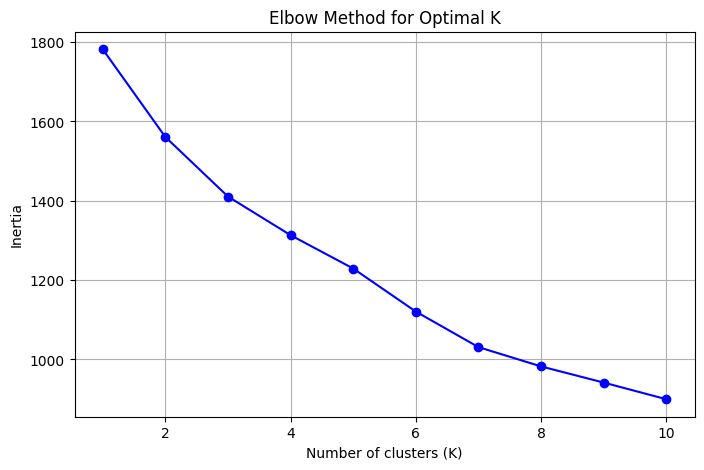

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

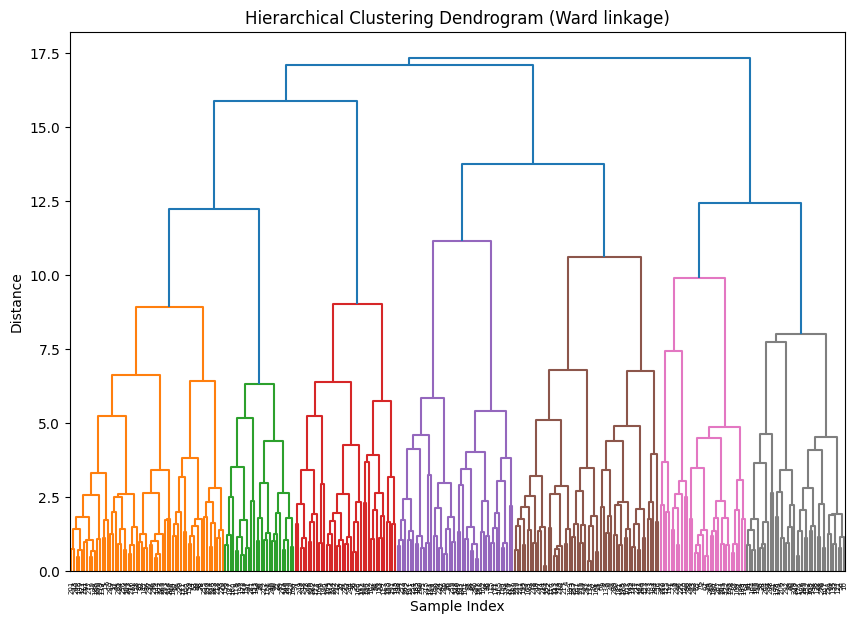

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X, method='ward')

plt.figure(figsize=(10,7))
dendrogram(linked,
           orientation='top',
           labels=None,
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


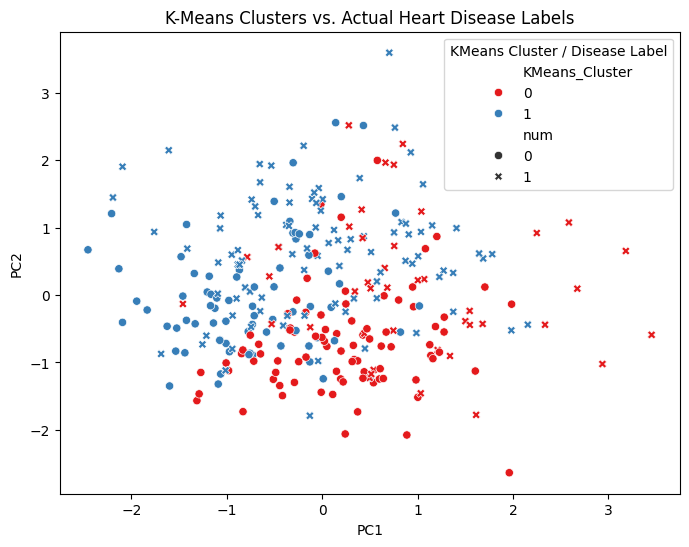

Actual Disease   0   1
Cluster               
0               86  42
1               74  95


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PC1'], y=df['PC2'], hue=df['KMeans_Cluster'], palette='Set1', style=df['num'])
plt.title('K-Means Clusters vs. Actual Heart Disease Labels')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='KMeans Cluster / Disease Label')
plt.show()

# Cluster/label comparison table
comparison = pd.crosstab(df['KMeans_Cluster'], df['num'], rownames=['Cluster'], colnames=['Actual Disease'])
print(comparison)

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add the principal components to the DataFrame for easier plotting
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Perform KMeans clustering with the optimal number of clusters (based on the elbow method, let's assume 2 for now based on the plot)
# You can adjust n_clusters based on your interpretation of the elbow and dendrogram plots.
optimal_k = 2 # Example: Assuming 2 from the Elbow plot
km = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init to suppress future warning
clusters = km.fit_predict(X) # Use the original data X for clustering

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters